In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
img_dir="/content/drive/MyDrive/all_data/train/non-radiology/images"

In [3]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import textwrap
import cv2

In [4]:
df = pd.read_table('/content/drive/MyDrive/all_data/captions.txt',header=None,names = ['image_id','caption'])


In [5]:
df

,image_id,caption
0,ROCO_81827,Scanning electron microscopy of demineralized...
1,ROCO_81835,"Schistosomiasis of the liver, showing the pec..."
2,ROCO_81851,Preoperative right fundus and OCT imaging in ...
3,ROCO_81853,Incubation of skin allografts in 85% glycerol...
4,ROCO_81857,“Hans Christian Jacobaeus (1879–1937)” Figure...
...,...,...
607,ROCO_87910,Laryngoscopy Post-treatment.
608,ROCO_87912,Colony and microscopic characteristics of Cam...
609,ROCO_87919,Clinical photograph of CHED demonstrating blu...
610,ROCO_87932,Schematic representation of a brain network m...


In [6]:

df['caption'].describe()

,caption
count,612
unique,612
top,Scanning electron microscopy of demineralized...
freq,1


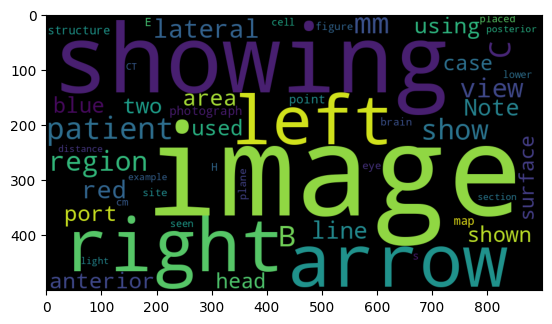

In [7]:
from wordcloud import WordCloud
caption_text=' '.join(df['caption'].astype(str))
wordcloud=WordCloud(width=900,height=500,max_words=50).generate(caption_text)
plt.imshow(wordcloud)

In [8]:
import os
import pandas as pd

# Define the root data directory (using raw string to handle backslashes)
data_dir = r'/content/drive/MyDrive/all_data'

# Initialize an empty list to store the data
data = []

# Iterate through each split (train, test, validation)
for split in ['train', 'test', 'validation']:
    split_dir = os.path.join(data_dir, split)

    # Iterate through each category (radiology, non-radiology)
    for category in ['radiology', 'non-radiology']:
        category_dir = os.path.join(split_dir, category)
        captions_file = os.path.join(category_dir, 'captions.txt')

        # Read captions.txt if it exists
        if os.path.exists(captions_file):
            with open(captions_file, 'r', encoding='utf-8', errors='ignore') as file:
                # Read each line in the file as a caption
                for line in file:
                    caption = line[12:].strip()
                    id = line[:12]
                    label = 'radiology' if category == 'radiology' else 'non-radiology'
                    # Append the caption, label, and split type to the data list
                    data.append([id, caption, label, split])

# Create a DataFrame with the collected data
data = pd.DataFrame(data, columns=['image_id', 'Caption', 'Label', 'Split'])

# Display the first few rows of the DataFrame
print(data.head())

        image_id                                            Caption  \
0  ROCO_00002\t   Computed tomography scan in axial view showing...   
1  ROCO_00003\t   Bacterial contamination occurred after complet...   
2  ROCO_00004\t   The patient had residual paralysis of the hand...   
3  ROCO_00005\t       Panoramic radiograph after immediate loading.   
4  ROCO_00007\t   Plain abdomen x-ray: Multiple air levels at th...   

       Label  Split  
0  radiology  train  
1  radiology  train  
2  radiology  train  
3  radiology  train  
4  radiology  train  


In [9]:

data.describe()

,image_id,Caption,Label,Split
count,87927,87927,87927,87927
unique,87927,86778,2,3
top,ROCO_00002\t,Preoperative radiograph,radiology,train
freq,1,25,81809,70345


In [10]:

data['Caption'].describe()

,Caption
count,87927
unique,86778
top,Preoperative radiograph
freq,25


In [11]:

data['Split'].describe()

,Split
count,87927
unique,3
top,train
freq,70345


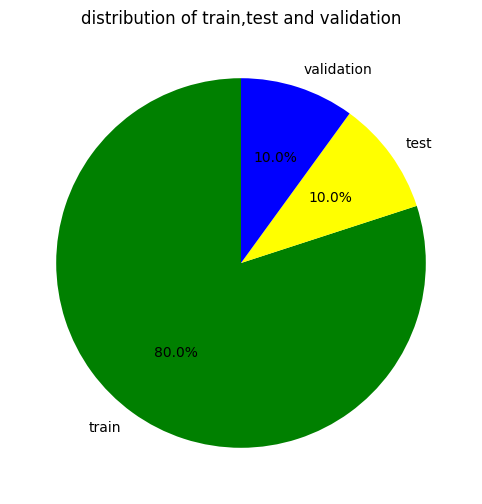

In [12]:

split_counts = data['Split'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(split_counts, labels=split_counts.index, autopct='%1.1f%%',startangle=90,colors=['green','yellow','blue'])
plt.title('distribution of train,test and validation')
plt.show()

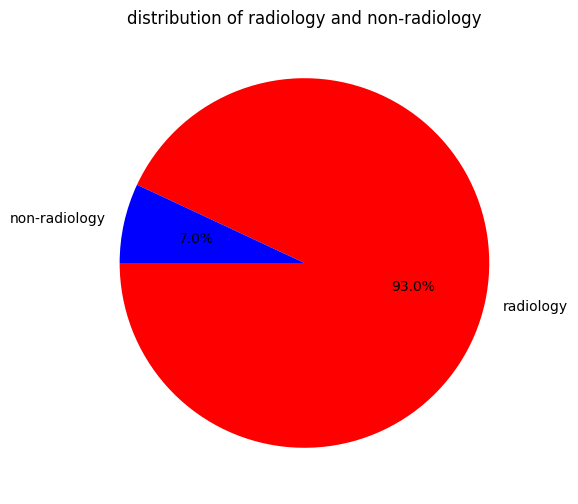

In [13]:

label_counts = data['Label'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',startangle=180,colors=['red','blue'])
plt.title('distribution of radiology and non-radiology')
plt.show()

In [14]:
import cv2
import numpy as np
import os


In [15]:
image_files=[f for f in os.listdir(img_dir) if f.endswith(".jpg")]

In [16]:
image_files

['PMC5026107_JCD-19-455-g001.jpg',
 'PMC5029975_AJUM-16-16-g001.jpg',
 'PMC5019016_biodiversity_data_journal-4-e8150-g145_b.jpg',
 'PMC5019035_JMP-41-169-g001.jpg',
 'PMC5021838_VetWorld-9-875-g002.jpg',
 'PMC5027184_ijmsv13p0664g002.jpg',
 'PMC5022334_CMJ-129-2160-g002.jpg',
 'PMC5020792_WJNM-15-184-g002.jpg',
 'PMC5026688_gr3.jpg',
 'PMC5024498_13018_2016_435_Fig3_HTML.jpg',
 'PMC5017969_40064_2016_3170_Fig3_HTML.jpg',
 'PMC5018035_11419_2016_315_Fig1_HTML.jpg',
 'PMC5017851_wjem-17-627-g002.jpg',
 'PMC5025574_13256_2016_1047_Fig5_HTML.jpg',
 'PMC5033996_12350_2015_351_Fig1_HTML.jpg',
 'PMC5019016_biodiversity_data_journal-4-e8150-g055_b.jpg',
 'PMC5035977_srep33584-f1.jpg',
 'PMC5022172_fnhum-10-00454-g001.jpg',
 'PMC5026080_IJO-64-530-g002.jpg',
 'PMC5021277_pone.0162311.g003.jpg',
 'PMC5018228_CG-CGCR160077F002.jpg',
 'PMC5034463_12968_2016_275_Fig3_HTML.jpg',
 'PMC5024913_AJUM-15-126-g002.jpg',
 'PMC5061678_40634_2016_63_Fig1_HTML.jpg',
 'PMC5058883_medi-94-e2036-g002.jpg',
 'PMC

In [17]:
img_path=os.path.join(img_dir,image_files[50])

In [18]:
print(img_path)

/content/drive/MyDrive/all_data/train/non-radiology/images/PMC5065672_WJO-7-657-g003.jpg


In [19]:
img=cv2.imread(img_path)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
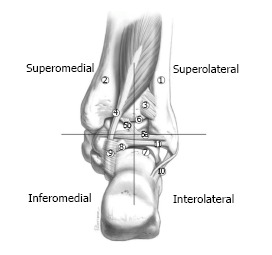

In [20]:
img

In [21]:
img.shape

(255, 272, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
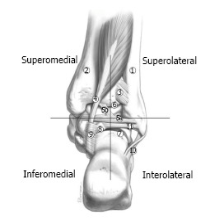

In [22]:
target_size=(224,224)
cv2.resize(img,target_size)

In [23]:
img_processed=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
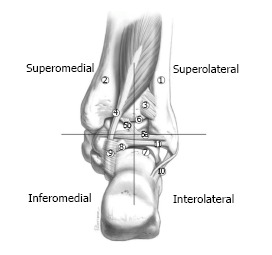

In [24]:
img

In [25]:
img_normalised=img/255

In [26]:
img_normalised

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [27]:
# Optional: Apply histogram equalization and denoising
img_eq = cv2.equalizeHist(img_processed.squeeze())
print(f"Equalized Image (first 5 pixels): {img_eq[:5, :5]}")

img_denoised = cv2.GaussianBlur(img_eq, (5, 5), 0)
print(f"Denoised Image (first 5 pixels): {img_denoised[:5, :5]}")


Equalized Image (first 5 pixels): [[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]
Denoised Image (first 5 pixels): [[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


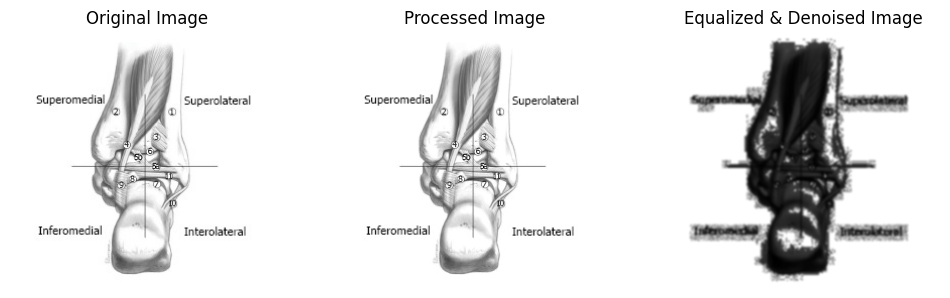

In [28]:
# Visualize the original, preprocessed, and denoised images
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
img_original = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed Image (Grayscale & Normalized)
plt.subplot(1, 3, 2)
plt.imshow(img_processed.squeeze(), cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Equalized and Denoised Image (Optional)
plt.subplot(1, 3, 3)
plt.imshow(img_denoised, cmap='gray')
plt.title('Equalized & Denoised Image')
plt.axis('off')

plt.show()


In [29]:
import tensorflow as tf

In [30]:
img=np.expand_dims(img,axis=0)


In [31]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2
    #zoom_range=0.2,
    horizontal_flip=0.2
                                        )
it=datagen.flow(img,batch_size=1)
augmented_images=[next(it)[0] for _ in range(5)]



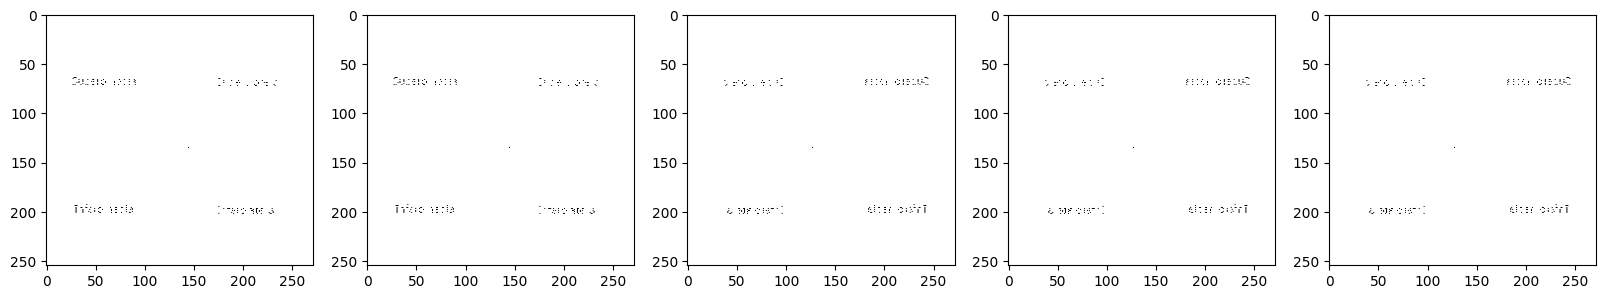

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i,aug_img in enumerate(augmented_images):
  plt.subplot(1,5,i+1)
  plt.imshow(aug_img)